## Part 2 - NumPy Basics

<a id="numpy"></a>

### Numpy

The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provides high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. 

To use `numpy`, you need to import the module:

In [1]:
import numpy as np

#### Creating Numpy arrays

There are a number of ways to initialize new Numpy arrays, for example from

* converting from Python lists or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, etc.

##### From lists

For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function

In [3]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4]) # shift + Tab -> show func help
v

array([1, 2, 3, 4])

In [4]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

The `v` and `M` objects are both of the type `ndarray` that the `numpy` module provides.

In [5]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

The difference between the `v` and `M` arrays is only their shapes. We can get information about the shape of an array by using the `ndarray.shape` property.

In [6]:
v.shape

(4,)

In [7]:
M.shape

(2, 2)

The number of elements in the array is available through the `ndarray.size` property:

In [8]:
M.size

4

Equivalently, we could use the function `numpy.shape` and `numpy.size`:

In [9]:
np.shape(M)

(2, 2)

In [10]:
np.size(M)

4

So far the `numpy.ndarray` looks a lot like a Python list (or nested list). Why not simply use Python lists for computations instead of creating a new array type? 

There are several reasons:

1. Arrays support vectorised operations, while lists don’t.
2. Once an array is created, you cannot change its size. You will have to create a new array or overwrite the existing one.
3. Every array has one and only one dtype. All items in it should be of that dtype.
4. An equivalent numpy array occupies much less space than a python list of lists.

Using the `dtype` (data type) property of an `ndarray`, we can see what type the data of an array has:

In [11]:
M.dtype

dtype('int32')

We get an error if we try to assign a value of the wrong type to an element in a numpy array:

In [12]:
M[0,0] = 'hello'

ValueError: invalid literal for int() with base 10: 'hello'

In [13]:
M[0,0] = 5

In [14]:
M

array([[5, 2],
       [3, 4]])

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [15]:
N = np.array([[1, 2], [3, 4]], dtype=float)
N

array([[1., 2.],
       [3., 4.]])

Common types that can be used with `dtype` are: `int`, `float`, `complex`, `bool`, and `object` (string).

We can also explicitly define the bit size of the data types, for example: `int64`, `int16`, `float128`, `complex128`.

#### Using array-generating functions

For larger arrays it is inpractical to initialize the data manually, using explicit pythons lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

In [16]:
# create a range (the end value is not included)
x = np.arange(-1, 1, 0.1) # arguments: start, stop, step
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [17]:
# dtype is determined automatically unless specified
x.dtype

dtype('float64')

In [18]:
# range of integers
y = np.arange(0, 10, 1) # arguments: start, stop, step
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
y.dtype

dtype('int32')

In [20]:
# specifying dtype as float
z = np.arange(0, 10, 1, dtype=float) # arguments: start, stop, step
z

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [21]:
z.dtype

dtype('float64')

In [22]:
# using linspace, both end points ARE included
np.linspace(0, 10, 11) # arguments: start, stop, N

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [23]:
# uniform random numbers in interval [0,1]
np.random.rand(5,5)

array([[0.46622456, 0.65525375, 0.36739527, 0.61582036, 0.4048658 ],
       [0.80143702, 0.53155841, 0.88056521, 0.20043676, 0.09094459],
       [0.39196219, 0.73629616, 0.3298802 , 0.098303  , 0.42206168],
       [0.35793013, 0.51870965, 0.56559585, 0.87628694, 0.94663531],
       [0.94127601, 0.62715798, 0.8567558 , 0.49877373, 0.85718526]])

In [24]:
# standard normal distributed random numbers
np.random.randn(5,5)

array([[ 0.18641366, -1.24833618, -0.37155565, -0.2500535 ,  0.92357999],
       [-0.45800459,  1.48031147,  0.5158218 ,  0.30017529, -0.69504527],
       [-0.2489201 , -0.20176309,  0.90074662, -0.52017766, -0.95534269],
       [-0.32049826, -1.10754028,  0.91821369,  0.79645268, -0.61197495],
       [ 1.54790541,  1.5402781 , -0.97643335, -0.1572469 ,  0.5847614 ]])

In [25]:
# zeros
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [26]:
# ones
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [27]:
# ones as int
np.ones((3,3), dtype=int)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [28]:
# three-dimensional
np.ones((3,3,3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [29]:
# diagonal matrix
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [30]:
# Create a square N × N identity matrix (1s on the diagonal and 0s elsewhere) 
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [31]:
np.eye(3,k=1) # k = 1: a positive value refers to an upper diagonal

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [32]:
np.eye(3,k=-1) # k = 1: a positive value refers to an upper diagonal

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

#### Indexing

We can index elements in an array using the square bracket and indices:

In [34]:
v, M

(array([1, 2, 3, 4]), array([[5, 2],
        [3, 4]]))

In [35]:
# v is a vector, and has only one dimension, taking one index
v[0]

1

In [36]:
# M is a matrix, or a 2 dimensional array, taking two indices 
M[1,1]

4

In [37]:
# If we omit an index of a multidimensional array it returns the whole row (or, in general, a N-1 dimensional array)
M[1]

array([3, 4])

The same thing can be achieved with using `:` instead of an index: 

In [38]:
M[1,:] # row 1

array([3, 4])

In [39]:
M[:,1] # column 1

array([2, 4])

We can assign new values to elements in an array using indexing:

In [43]:
M[0,0] = -1
M

array([[-1, -2],
       [ 3, -2]])

In [44]:
# also works for rows and columns
M[0,:] = 0
M

array([[ 0,  0],
       [ 3, -2]])

In [45]:
M[:,1] = -2
M

array([[ 0, -2],
       [ 3, -2]])

#### Index slicing

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [46]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [47]:
A[1:3]

array([2, 3])

Array slices are *mutable*: if they are assigned a new value the original array from which the slice was extracted is modified:

In [48]:
A[1:3] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`:

In [49]:
A[::] # lower, upper, step all take the default values

array([ 1, -2, -3,  4,  5])

In [50]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [51]:
A[:3] # first three elements

array([ 1, -2, -3])

In [52]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array (positive index from the begining):

In [53]:
A = np.array([1,2,3,4,5])

In [54]:
A[-1] # the last element in the array

5

In [55]:
A[-3:] # the last three elements

array([3, 4, 5])

Index slicing works exactly the same way for multidimensional arrays:
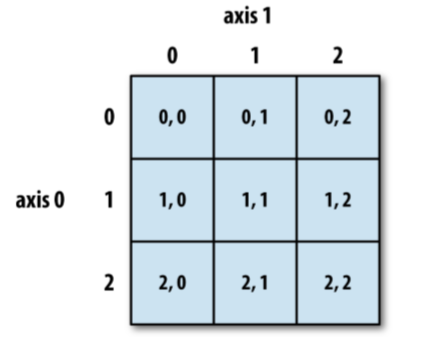

In [56]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [57]:
# a block from the original array
# return elements with row & column indexes 1, 2, 3 
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [58]:
# return all elements with even indexes
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

#### Fancy indexing

Fancy indexing is the name for when an array or list is used in-place of an index: 

In [59]:
row_indices = [1, 2, 3]
A[row_indices]

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]])

In [62]:
col_indices = [1, 2, 3]
A[:,col_indices]

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33],
       [41, 42, 43]])

In [63]:
A[row_indices, col_indices]

array([11, 22, 33])

In [64]:
# equivalent to
A[1,1], A[2,2], A[3,3]

(11, 22, 33)

We can also index *masks*: If the index mask is an Numpy array of with data type `bool`, then an element is selected (True) or not (False) depending on the value of the index mask at the position each element: 

In [65]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [66]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [67]:
# same thing
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

This feature is very useful to conditionally select elements from an array, using for example comparison operators:

In [68]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [69]:
# want values of x that are at least 5 and have no decimal component
mask = (x >= 5) & (x % 1 == 0)
mask

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [70]:
x[mask]

array([5., 6., 7., 8., 9.])

In [71]:
x[x > 5]

array([5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

#### Linear algebra

Vectorizing code is the key to writing efficient numerical calculation with Python/Numpy. That means that as much as possible of a program should be formulated in terms of matrix and vector operations, like matrix-matrix multiplication.

In [72]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [73]:
v1 * 2

array([0, 2, 4, 6, 8])

In [74]:
v1 + 2

array([2, 3, 4, 5, 6])

In [75]:
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [76]:
np.dot(A, A) # A(mxn) * B(nxp) = C (mxp) , Cij = sum(Cij = aik * bkj) , k = 0 -> n-1 

array([[ 300,  310,  320,  330,  340],
       [1300, 1360, 1420, 1480, 1540],
       [2300, 2410, 2520, 2630, 2740],
       [3300, 3460, 3620, 3780, 3940],
       [4300, 4510, 4720, 4930, 5140]])

In [77]:
np.dot(A, v1)

array([ 30, 130, 230, 330, 430])

In [78]:
np.dot(v1, v1)

30

Alternatively, we can cast the array objects to the type `matrix`. This changes the behavior of the standard arithmetic operators `+, -, *` to use matrix algebra.

In [79]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vectorm

In [80]:
M

matrix([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14],
        [20, 21, 22, 23, 24],
        [30, 31, 32, 33, 34],
        [40, 41, 42, 43, 44]])

In [81]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [82]:
M*M

matrix([[ 300,  310,  320,  330,  340],
        [1300, 1360, 1420, 1480, 1540],
        [2300, 2410, 2520, 2630, 2740],
        [3300, 3460, 3620, 3780, 3940],
        [4300, 4510, 4720, 4930, 5140]])

In [83]:
M*v

matrix([[ 30],
        [130],
        [230],
        [330],
        [430]])

#### Transpose and Reshape

In [84]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [85]:
A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [86]:
np.transpose(A)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [87]:
np.reshape(A,(3,2))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [88]:
A.reshape(3,2)

array([[1, 2],
       [3, 4],
       [5, 6]])

#### Data computations

In [89]:
v1

array([0, 1, 2, 3, 4])

In [90]:
np.mean(v1)

2.0

In [91]:
np.std(v1), np.var(v1)

(1.4142135623730951, 2.0)

In [92]:
v1.min()

0

In [93]:
v1.max()

4

In [94]:
sum(v1)

10

In [95]:
np.argmin(v1)

0

In [96]:
np.argmax(v1)

4